# Basic imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Loading datasets

In [2]:
cns_df=pd.read_csv("cns_molecules.csv", sep="\t")
non_cns_df=pd.read_csv("non_cns_molecules.csv", sep="\t")

In [3]:
cns_df_length=len(cns_df)
non_cns_df_length=len(non_cns_df)

print("cns rows: {}".format(cns_df_length))
print("non cns rows: {}".format(non_cns_df_length))

cns rows: 316
non cns rows: 624


# New column for both datasets (1= true, 0=false)

In [4]:
new_cns_column=[1 for i in range(cns_df_length)]
new_non_cns_columns=[0 for i in range(non_cns_df_length)]

In [5]:
cns_df["p_meninges"]=new_cns_column
non_cns_df["p_meninges"]=new_non_cns_columns

### Merged dataset

In [6]:
m_df=cns_df
m_df=m_df.append(non_cns_df)

### Shuffle dataset

The idiomatic way to do this with Pandas is to use the .sample method of your dataframe to sample all rows without replacement:

df.sample(frac=1)
The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).

Note: If you wish to shuffle your dataframe in-place and reset the index, you could do e.g.

df = df.sample(frac=1).reset_index(drop=True)
Here, specifying drop=True prevents .reset_index from creating a column containing the old index entries.

In [7]:
m_df=m_df.sample(frac=1,random_state=0).reset_index(drop=True)

In [8]:
m_df.to_csv("molecules.csv",sep="\t",index = False, header=True); m_df

,m_name,n_atoms_without_Hydrogen,n_atoms_with_Hydrogen,m_weight,m_avg_weigth,m_weigth_without_Hydrogen,n_radical_electrons,n_valence_electrons,n_aliphatic_carbocycles,n_aliphatic_heterocycles,...,n_Hydrogen_acceptors,n_Hydrogen_donnors,n_briged_head_atoms,n_atoms_stereo_centers,n_atoms_unspecified_stereo_centers,n_spiro_atoms,m_logp,m_mr,fraction_CSP3,p_meninges
0,BUMETANIDE,25,45,364.109293,344.263,364.423,0,134,0,0,...,5,3,0,0,0,0,3.0365,94.6882,0.235294,0
1,BACLOFEN,14,26,213.055656,201.568,213.664,0,76,0,0,...,2,2,0,1,1,0,1.8570,55.5002,0.300000,1
2,METYRAPONE,17,31,226.110613,212.167,226.279,0,86,0,0,...,3,0,0,0,0,0,2.6371,65.8305,0.214286,0
3,METHYLPHENOBARBITAL,18,32,246.100442,232.154,246.266,0,94,0,1,...,3,1,0,1,1,0,1.0426,64.7197,0.307692,1
4,DULOXETINE,21,40,297.118735,278.271,297.423,0,108,0,0,...,3,1,0,1,1,0,4.6309,90.1797,0.222222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,SAPROPTERIN,17,32,241.117489,226.131,241.251,0,94,0,1,...,7,6,0,3,3,0,-1.7002,62.8581,0.555556,0
936,PHENELZINE,10,22,136.100048,124.102,136.198,0,54,0,0,...,2,2,0,0,0,0,0.6924,42.3361,0.250000,1
937,ISOPROTERENOL_HYDROCHLORIDE,15,32,211.120843,194.125,211.261,0,84,0,0,...,4,4,0,1,1,0,1.1292,57.8701,0.454545,0
938,FLOCTAFENINE,29,46,406.114042,389.224,406.360,0,152,0,0,...,6,3,0,1,1,0,3.5072,99.8448,0.200000,0


# Masks

In [9]:
mask_p_meninges=m_df["p_meninges"]==1
mask_not_p_meninges=m_df["p_meninges"]==0

In [10]:
passes=m_df[mask_p_meninges]
not_passes=m_df[mask_not_p_meninges]

In [11]:
columns=m_df.columns.values; columns

array(['m_name', 'n_atoms_without_Hydrogen', 'n_atoms_with_Hydrogen',
       'm_weight', 'm_avg_weigth', 'm_weigth_without_Hydrogen',
       'n_radical_electrons', 'n_valence_electrons',
       'n_aliphatic_carbocycles', 'n_aliphatic_heterocycles',
       'n_aliphatic_rings', 'n_amide_bonds', 'n_aromatic_carbocycles',
       'n_aromatic_heterocycles', 'n_aromatic_rings',
       'n_saturated_carbocycles', 'n_saturated_heterocycles',
       'n_saturated_rings', 'n_HBA', 'n_HBD', 'n_hetero_atoms',
       'n_hetero_cycles', 'n_rings', 'n_strict_rotable_bonds',
       'n_non_strict_rotable_bonds', 'n_primary_carbon_atoms', 'n_HOH',
       'n_O', 'n_Hydrogen_acceptors', 'n_Hydrogen_donnors',
       'n_briged_head_atoms', 'n_atoms_stereo_centers',
       'n_atoms_unspecified_stereo_centers', 'n_spiro_atoms', 'm_logp',
       'm_mr', 'fraction_CSP3', 'p_meninges'], dtype=object)

# Analazing n data from k column

In [12]:
def drawBarDiagram(df,start,end,label):
    x=df[start:end].index.values
    y=[x for i,x in enumerate(df[label].values) if i<end]

    def printer(x,y,x_label,y_label):
        temp_dict={x_label:x,y_label:y}
        df=pd.DataFrame(temp_dict)
        df.plot.bar(x_label,y_label)
    
    printer(x,y,"Molecule name",label)

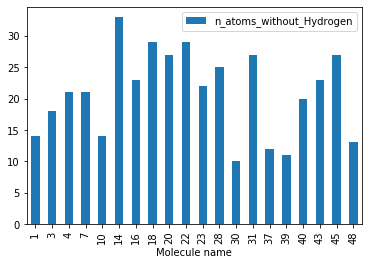

In [13]:
drawBarDiagram(passes,0,20,columns[1])

# Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [15]:
o_df=m_df.set_index(["m_name"])

In [16]:
clf = LinearSVC(random_state=0, tol=1e-5, dual=False)

In [17]:
y=o_df["p_meninges"]
x=o_df.drop(["p_meninges"],axis=1)

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [19]:
clf.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [20]:
predicted=clf.predict(x_test)

In [21]:
matrix=confusion_matrix(y_test,predicted); matrix

array([[104,   9],
       [ 29,  46]], dtype=int64)

In [22]:
print("f1 score: {}%".format(f1_score(y_test,predicted)*100)) 
print("accuracy score: {}%".format(accuracy_score(y_test,predicted)*100))

f1 score: 70.76923076923075%
accuracy score: 79.7872340425532%


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [24]:
selector = SelectKBest(mutual_info_regression, k=15)
selector.fit(x,y)

SelectKBest(k=15,
            score_func=<function mutual_info_regression at 0x00000232A52B69D8>)

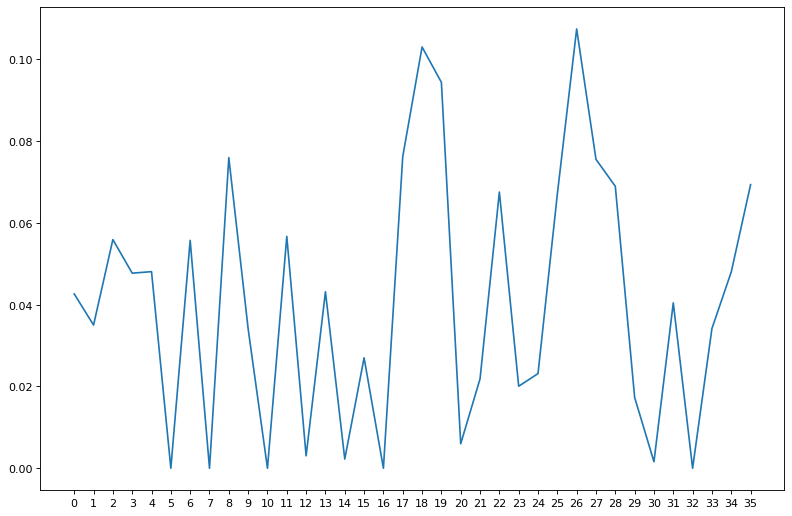

In [34]:
scores = selector.scores_
plt.figure(figsize=(12,8),dpi=80)
plt.plot(scores)
plt.xticks(np.arange(len(x.columns)),[x for x in range(len(x.columns))]);

In [39]:
counter=0
for label,i in zip(o_df.columns,scores):
    print("label #{}: {} -> {}".format(counter,label,i))
    counter=counter+1

label #0: n_atoms_without_Hydrogen -> 0.04264674071868768
label #1: n_atoms_with_Hydrogen -> 0.035022802462663094
label #2: m_weight -> 0.05593926938200244
label #3: m_avg_weigth -> 0.04772337755025724
label #4: m_weigth_without_Hydrogen -> 0.04809340316251287
label #5: n_radical_electrons -> 0.0
label #6: n_valence_electrons -> 0.05574622597500323
label #7: n_aliphatic_carbocycles -> 0.0
label #8: n_aliphatic_heterocycles -> 0.07597908989372648
label #9: n_aliphatic_rings -> 0.03411020148489996
label #10: n_amide_bonds -> 0.0
label #11: n_aromatic_carbocycles -> 0.056714061146675654
label #12: n_aromatic_heterocycles -> 0.0030464831988705754
label #13: n_aromatic_rings -> 0.04316693851125741
label #14: n_saturated_carbocycles -> 0.0022492327268124335
label #15: n_saturated_heterocycles -> 0.027017066751515273
label #16: n_saturated_rings -> 0.0
label #17: n_HBA -> 0.07622296026800424
label #18: n_HBD -> 0.10304947362880146
label #19: n_hetero_atoms -> 0.09440538435989865
label #20: n_